# ADI Stock Dataset

In [429]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
%matplotlib inline
import seaborn as sns

In [430]:
sns.set()

In [431]:
filename = 'stock_market/Stocks/adi.us.txt'

In [432]:
data = pd.read_csv(filename)

## Data Exploration

In [433]:
data.shape

(8398, 7)

In [434]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-07-19,2.0647,2.0730,2.0397,2.0397,256877,0
1,1984-07-20,2.0482,2.0730,2.0151,2.0151,78389,0
2,1984-07-23,1.9818,1.9903,1.9154,1.9321,947913,0
3,1984-07-24,1.9321,1.9903,1.9321,1.9818,336472,0
4,1984-07-25,2.0064,2.0064,1.9569,1.9903,593348,0


In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8398 entries, 0 to 8397
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     8398 non-null   object 
 1   Open     8398 non-null   float64
 2   High     8398 non-null   float64
 3   Low      8398 non-null   float64
 4   Close    8398 non-null   float64
 5   Volume   8398 non-null   int64  
 6   OpenInt  8398 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 459.4+ KB


In [436]:
data['OpenInt'].nunique()

1

We drop the OpenInt column because it only contains one entry in all cells and is useless for our ML models.

In [437]:
data = data.drop('OpenInt', axis = 1)

In [438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8398 entries, 0 to 8397
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8398 non-null   object 
 1   Open    8398 non-null   float64
 2   High    8398 non-null   float64
 3   Low     8398 non-null   float64
 4   Close   8398 non-null   float64
 5   Volume  8398 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 393.8+ KB


No empty cells

The date column has object dtype. We convert this to the datetime64 dtype

In [439]:
data['Date'] = pd.to_datetime(data['Date'])

Set the date column to the index

In [440]:
data = data.set_index('Date')

In [441]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
1984-07-19,2.0647,2.0730,2.0397,2.0397,256877
1984-07-20,2.0482,2.0730,2.0151,2.0151,78389
1984-07-23,1.9818,1.9903,1.9154,1.9321,947913
1984-07-24,1.9321,1.9903,1.9321,1.9818,336472
1984-07-25,2.0064,2.0064,1.9569,1.9903,593348


In [442]:
data.index

DatetimeIndex(['1984-07-19', '1984-07-20', '1984-07-23', '1984-07-24',
               '1984-07-25', '1984-07-26', '1984-07-27', '1984-07-30',
               '1984-07-31', '1984-08-01',
               ...
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', name='Date', length=8398, freq=None)

This is currently not a time series because there is no frequency. This appears to be because there is no data for the weekends. Let's confirm this first.

In [472]:
a = pd.DataFrame(data.index.dayofweek.value_counts())

In [474]:
a.columns = ['Count']

In [476]:
a.index.name = 'Day of Week'

In [487]:
a.sort_index(ascending=True).T

Day of Week,0,1,2,3,4
Count,1589,1719,1722,1689,1679


We need to introduce the missing dates into or index.

In [340]:
data.index.max()

Timestamp('2017-11-10 00:00:00')

In [341]:
data.index.min()

Timestamp('1984-07-19 00:00:00')

In [342]:
date_range = data.index.max() - data.index.min()
print(date_range)
print(len(data.index))

12167 days 00:00:00
8398


Roughly a third of the days are missing. We introduce these missing dates into our index now.

In [343]:
new_index = pd.date_range(data.index.min(), data.index.max())

In [344]:
new_index

DatetimeIndex(['1984-07-19', '1984-07-20', '1984-07-21', '1984-07-22',
               '1984-07-23', '1984-07-24', '1984-07-25', '1984-07-26',
               '1984-07-27', '1984-07-28',
               ...
               '2017-11-01', '2017-11-02', '2017-11-03', '2017-11-04',
               '2017-11-05', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', length=12168, freq='D')

In [345]:
data_new = data.reindex(new_index)

In [346]:
data_new

,Open,High,Low,Close,Volume
1984-07-19,2.0647,2.0730,2.0397,2.0397,256877.0
1984-07-20,2.0482,2.0730,2.0151,2.0151,78389.0
1984-07-21,NaN,NaN,NaN,NaN,NaN
1984-07-22,NaN,NaN,NaN,NaN,NaN
1984-07-23,1.9818,1.9903,1.9154,1.9321,947913.0
...,...,...,...,...,...
2017-11-06,92.4200,92.9600,91.6500,92.2800,1530934.0
2017-11-07,92.0800,92.5700,91.7000,91.9000,1416911.0
2017-11-08,91.9000,92.4462,91.0400,92.0000,1617599.0
2017-11-09,91.6700,91.6900,87.9800,89.7000,3143601.0


Now our data comes in at a regular frequency, i.e., daily and so we have a time series. However, we have blank values corresponding to the dates which have been freshly introduced. We interpolate the data from the respective columns for these newly introduced dates.

In [348]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [349]:
data_new[cols] = data_new[cols].interpolate()

In [350]:
data_new.head()

,Open,High,Low,Close,Volume
1984-07-19,2.064700,2.073000,2.039700,2.039700,256877.000000
1984-07-20,2.048200,2.073000,2.015100,2.015100,78389.000000
1984-07-21,2.026067,2.045433,1.981867,1.987433,368230.333333
1984-07-22,2.003933,2.017867,1.948633,1.959767,658071.666667
1984-07-23,1.981800,1.990300,1.915400,1.932100,947913.000000


In [351]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12168 entries, 1984-07-19 to 2017-11-10
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12168 non-null  float64
 1   High    12168 non-null  float64
 2   Low     12168 non-null  float64
 3   Close   12168 non-null  float64
 4   Volume  12168 non-null  float64
dtypes: float64(5)
memory usage: 570.4 KB


We now plot the time series to get a sense of our dataset.

Text(0.5, 1.0, 'Opening Price of ADI Stock')

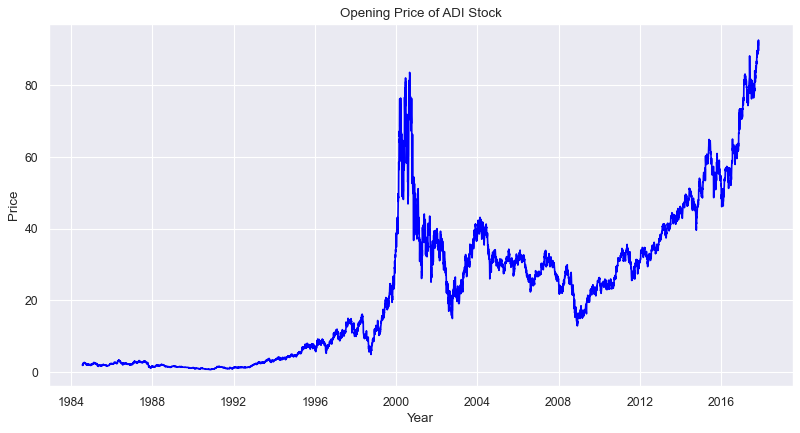

In [656]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(data_new['Open'], 'blue')
plt.xlabel('Year');
plt.ylabel('Price')
plt.title('Opening Price of ADI Stock')

In [669]:
def get_n_last_days(df, series_name, n_days):
    """
    Extract last n_days of a daily time series
    """
    
    return df[series_name][-(n_days):] 

def plot_n_last_days(df, series_name, n_days):
    """
    Plot last n_days of an hourly time series 
    """
    plt.figure(figsize = (10,5))   
    plt.plot(get_n_last_days(df, series_name, n_days), 'blue')
    plt.title('{0} ADI Stock Time Series - {1} days'
              .format(series_name, n_days))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(alpha=0.3)

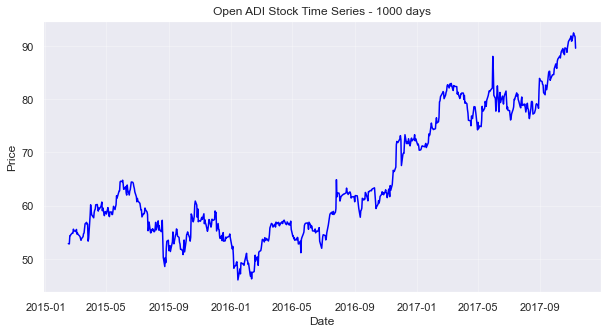

In [670]:
plot_n_last_days(data_new, 'Open', 1000)

**Transform the series to the required format.**

In [902]:
def get_keras_format_series(series):
    """
    Convert a series to a numpy array of shape 
    [n_samples, time_steps, features]
    """
    
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

def get_train_test_data(df, series_name, series_days, input_days, 
                        test_days, sample_gap=2):
    """
    Utility processing function that splits an hourly time series into 
    train and test with keras-friendly format, according to user-specified
    choice of shape.    
    
    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_days (int): length of sequence input to network 
    test_days (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5
    
    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y     
    """
    
    forecast_series = get_n_last_days(df, series_name, series_days).values # reducing our forecast series to last n days

    train = forecast_series[:-test_days] # training data is remaining days until amount of test_days
    test = forecast_series[-test_days:] # test data is the remaining test_days

    train_X, train_y = [], []

    # range 0 through # of train samples - input_hours by sample_gap. 
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_days, sample_gap): 
        train_X.append(train[i:i+input_days]) # each training sample is of length input days
        train_y.append(train[i+input_days]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras
    
    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_days] 
    test_y = test[input_days:] # test_y is remaining values from test set
    
    return train_X, test_X_init, train_y, test_y

**Traing the models on the 'Open' series.**

In [903]:
series_days = 1000
input_days = 15
test_days = 30

train_X, test_X_init, train_y, test_y = (get_train_test_data(data_new, 'Open', series_days, 
                         input_days, test_days))

In [904]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (478, 15, 1)
Training output shape: (478,)
Test input shape: (15,)
Test output shape: (15,)


In [905]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout, GRU
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [906]:
def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

## Base RNN Model

In [907]:
model_RNN1 = fit_SimpleRNN(train_X, train_y, cell_units=10, epochs=10)

In [908]:
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series      
    """
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds

def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_days)  #predict range is going to be from end of X_init to length of test_hours
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

Text(0.5, 1.0, 'Opening Price of ADI Stock Over last 30 days')

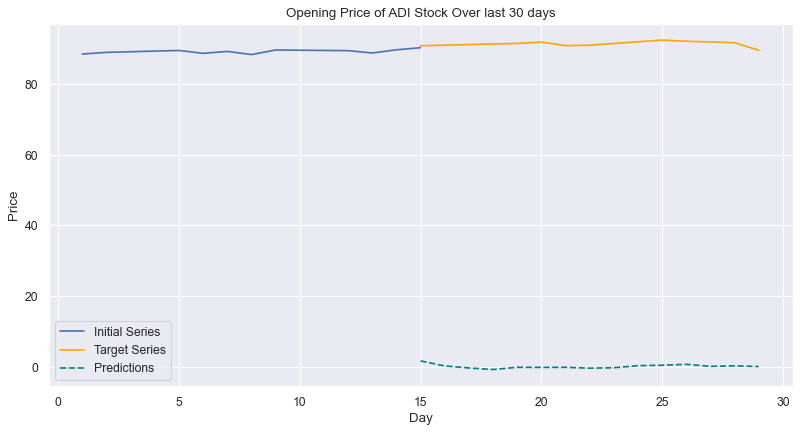

In [909]:
plt.figure(figsize=(12, 6), dpi=80)


predict_and_plot(test_X_init, test_y, model_RNN1,
                 'Opening Price of ADI Stock')

plt.xlabel('Day');
plt.ylabel('Price')
plt.title('Opening Price of ADI Stock Over last 30 days')

## RNN2: RNN Model with increased cell units and epochs

In [910]:
model_RNN2 = fit_SimpleRNN(train_X, train_y, cell_units=200, epochs=10000)


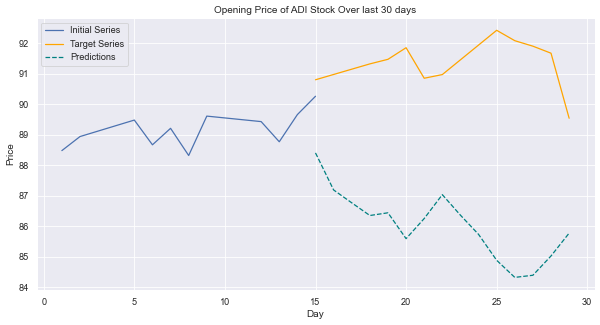

In [911]:
plt.figure(figsize=(12, 6), dpi=60)



predict_and_plot(test_X_init, test_y, model_RNN2,
                 'PM Series: Test Data and Simple RNN Predictions')


plt.xlabel('Day');
plt.ylabel('Price')
plt.title('Opening Price of ADI Stock Over last 30 days');


In [756]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_RNN2)

In [757]:
y_preds = np.array(y_preds)

In [758]:
test_y = test_y.reshape(-1,1)

In [759]:
np.sqrt(((test_y - y_preds)**2).sum()/len(test_y))

4.232441234729057

In [760]:
model_RNN1.summary()

Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_106 (SimpleRNN)  (None, 10)                120       
                                                                 
 dense_126 (Dense)           (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [761]:
model_RNN2.summary()

Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_107 (SimpleRNN)  (None, 200)               40400     
                                                                 
 dense_127 (Dense)           (None, 1)                 201       
                                                                 
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________


## RNN3: RNN model with increased cell units but same number of epochs

In [762]:
model_RNN3 = fit_SimpleRNN(train_X, train_y, cell_units=250, epochs=10000)

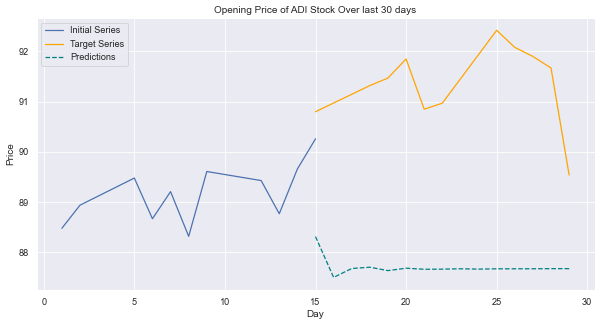

In [768]:
plt.figure(figsize=(12, 6), dpi=60)
predict_and_plot(test_X_init, test_y, model_RNN3,
                 'PM Series: Test Data and Simple RNN Predictions')
plt.xlabel('Day');
plt.ylabel('Price')
plt.title('Opening Price of ADI Stock Over last 30 days');


In [764]:
model_RNN3.summary()

Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_108 (SimpleRNN)  (None, 250)               63000     
                                                                 
 dense_128 (Dense)           (None, 1)                 251       
                                                                 
Total params: 63,251
Trainable params: 63,251
Non-trainable params: 0
_________________________________________________________________


In [770]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_RNN2)
y_preds = np.array(y_preds)
test_y = test_y.reshape(-1,1)
np.sqrt(((test_y - y_preds)**2).sum()/len(test_y))

4.232441234729057

In [769]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_RNN3)
y_preds = np.array(y_preds)
test_y = test_y.reshape(-1,1)
np.sqrt(((test_y - y_preds)**2).sum()/len(test_y))

3.7246138626573706

In [490]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1))) #,return_sequences= True))
    #model.add(LSTM(cell_units_l2, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

## LSTM Model 

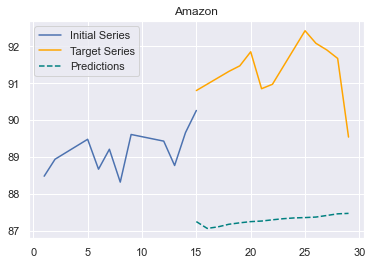

In [491]:
series_days = 500
input_days = 15
test_days = 30

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_new, 'Open', series_days, 
                         input_days, test_days))

model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 

predict_and_plot(test_X_init, test_y, model_LSTM, 
                 'Amazon')

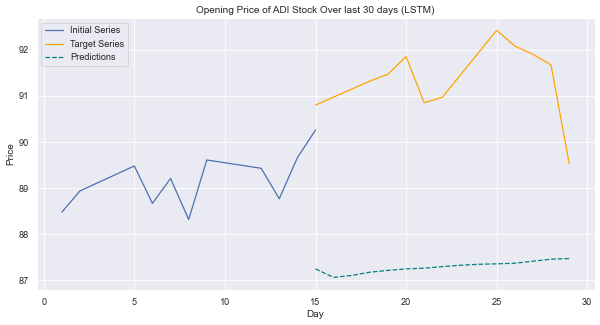

In [774]:
plt.figure(figsize=(12, 6), dpi=60)
predict_and_plot(test_X_init, test_y, model_LSTM,
                 ' Test Data and Simple RNN Predictions')
plt.xlabel('Day');
plt.ylabel('Price')
plt.title('Opening Price of ADI Stock Over last 30 days (LSTM)');

In [775]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_LSTM)
y_preds = np.array(y_preds)
test_y = test_y.reshape(-1,1)
np.sqrt(((test_y - y_preds)**2).sum()/len(test_y))

4.121694531604244

In [505]:
def fit_GRU(train_X, train_y, cell_units, epochs):
    """
    Fit GRU to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(GRU(cell_units, input_shape=(train_X.shape[1],1))) #,return_sequences= True))
    #model.add(LSTM(cell_units_l2, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

## GRU Model

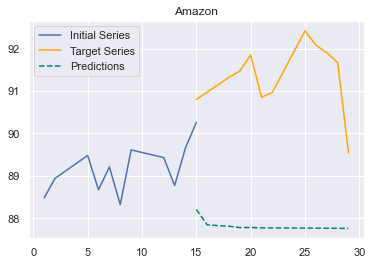

In [506]:
series_days = 500
input_days = 15
test_days = 30

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_new, 'Open', series_days, 
                         input_days, test_days))

model_GRU = fit_GRU(train_X, train_y, cell_units=100, epochs=10000) 

predict_and_plot(test_X_init, test_y, model_GRU, 
                 'Amazon')

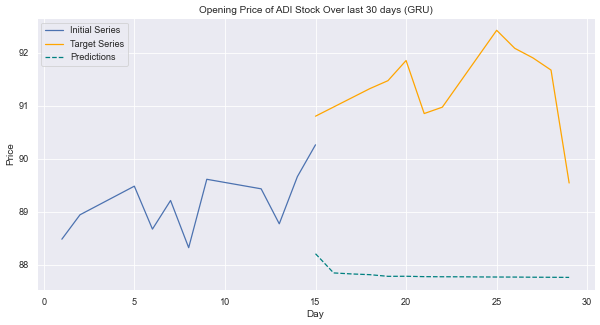

In [778]:
plt.figure(figsize=(12, 6), dpi=60)
predict_and_plot(test_X_init, test_y, model_GRU,
                 ' Test Data and Simple RNN Predictions')
plt.xlabel('Day');
plt.ylabel('Price')
plt.title('Opening Price of ADI Stock Over last 30 days (GRU)');

In [777]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_GRU)
y_preds = np.array(y_preds)
test_y = test_y.reshape(-1,1)
np.sqrt(((test_y - y_preds)**2).sum()/len(test_y))

3.6196611452189815

### LSTM Model prediction for 'Close' series

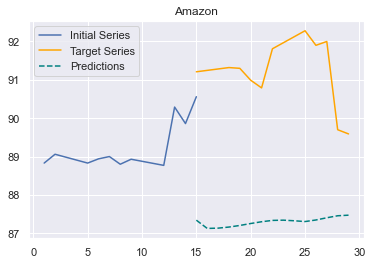

In [507]:
series_days = 500
input_days = 15
test_days = 30

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_new, 'Close', series_days, 
                         input_days, test_days))
#model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 

predict_and_plot(test_X_init, test_y, model_LSTM, 
                 'Amazon')

### GRU Model prediction for Close Series

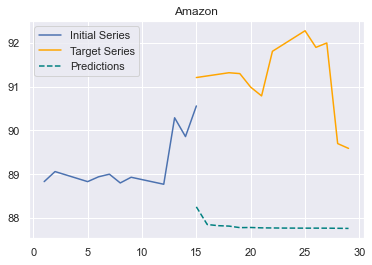

In [514]:
series_days = 500
input_days = 15
test_days = 30

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_new, 'Close', series_days, 
                         input_days, test_days))
#model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 

predict_and_plot(test_X_init, test_y, model_GRU, 
                 'Amazon')

In [509]:
model_GRU

### RNN2 prediction for High series

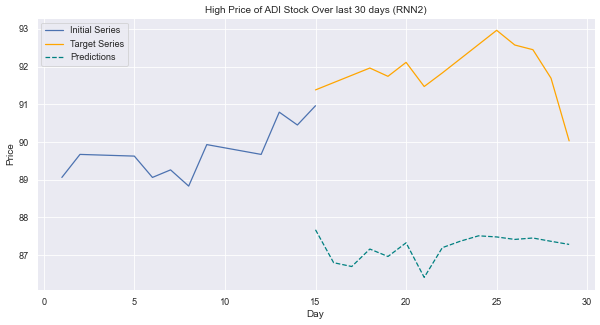

In [801]:
train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_new, 'High', series_days, 
                         input_days, test_days))
#model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 

plt.figure(figsize=(12, 6), dpi=60)

predict_and_plot(test_X_init, test_y, model_RNN2, 
                 'Amazon')
plt.xlabel('Day');
plt.ylabel('Price')
plt.title('High Price of ADI Stock Over last 30 days (RNN2)');



In [804]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_RNN2)
y_preds = np.array(y_preds)
test_y = test_y.reshape(-1,1)
np.sqrt(((test_y - y_preds)**2).sum()/len(test_y))

4.724732390671225

### RNN2 prediction for Low Series

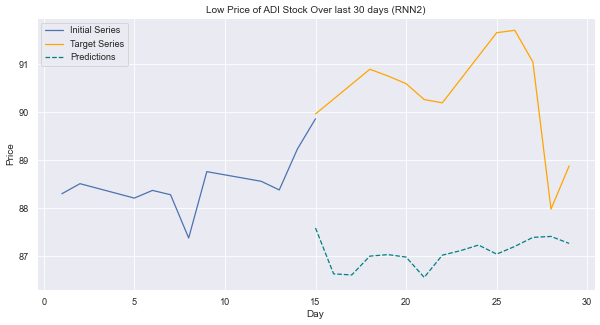

In [805]:
train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_new, 'Low', series_days, 
                         input_days, test_days))
#model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 

plt.figure(figsize=(12, 6), dpi=60)

predict_and_plot(test_X_init, test_y, model_RNN2, 
                 'Amazon')
plt.xlabel('Day');
plt.ylabel('Price')
plt.title('Low Price of ADI Stock Over last 30 days (RNN2)');



In [806]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_RNN2)
y_preds = np.array(y_preds)
test_y = test_y.reshape(-1,1)
np.sqrt(((test_y - y_preds)**2).sum()/len(test_y))

3.5212535472565207

### RNN2 prediction for Closing Series

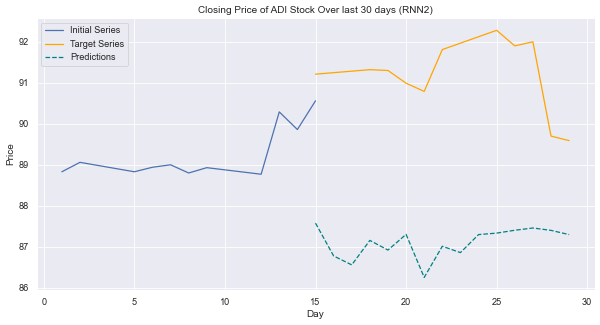

In [807]:
train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_new, 'Close', series_days, 
                         input_days, test_days))
#model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 

plt.figure(figsize=(12, 6), dpi=60)

predict_and_plot(test_X_init, test_y, model_RNN2, 
                 'Amazon')
plt.xlabel('Day');
plt.ylabel('Price')
plt.title('Closing Price of ADI Stock Over last 30 days (RNN2)');



In [808]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_RNN2)
y_preds = np.array(y_preds)
test_y = test_y.reshape(-1,1)
np.sqrt(((test_y - y_preds)**2).sum()/len(test_y))

4.277033935166804

### Let's try training our models on other series. Let's first use the Low series

## RNN2 Model on the Low series

In [515]:
series_days = 1000
input_days = 15
test_days = 30

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_new, 'Low', series_days, 
                         input_days, test_days))

model_RNN2 = fit_SimpleRNN(train_X, train_y, cell_units=200, epochs=10000)

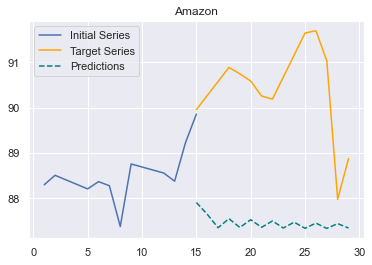

In [516]:
predict_and_plot(test_X_init, test_y, model_RNN2, 
                 'Amazon')

In [517]:
data

,Open,High,Low,Close,Volume
Date,,,,,
1984-07-19,2.0647,2.0730,2.0397,2.0397,256877
1984-07-20,2.0482,2.0730,2.0151,2.0151,78389
1984-07-23,1.9818,1.9903,1.9154,1.9321,947913
1984-07-24,1.9321,1.9903,1.9321,1.9818,336472
1984-07-25,2.0064,2.0064,1.9569,1.9903,593348
...,...,...,...,...,...
2017-11-06,92.4200,92.9600,91.6500,92.2800,1530934
2017-11-07,92.0800,92.5700,91.7000,91.9000,1416911
2017-11-08,91.9000,92.4462,91.0400,92.0000,1617599


## We now change the frequency of our dataset and try weekly sampling instead.

In [518]:
data_weekly = data.resample('W').mean()

In [520]:
data_weekly.index

DatetimeIndex(['1984-07-22', '1984-07-29', '1984-08-05', '1984-08-12',
               '1984-08-19', '1984-08-26', '1984-09-02', '1984-09-09',
               '1984-09-16', '1984-09-23',
               ...
               '2017-09-10', '2017-09-17', '2017-09-24', '2017-10-01',
               '2017-10-08', '2017-10-15', '2017-10-22', '2017-10-29',
               '2017-11-05', '2017-11-12'],
              dtype='datetime64[ns]', name='Date', length=1739, freq='W-SUN')

In [522]:
data_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1739 entries, 1984-07-22 to 2017-11-12
Freq: W-SUN
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1739 non-null   float64
 1   High    1739 non-null   float64
 2   Low     1739 non-null   float64
 3   Close   1739 non-null   float64
 4   Volume  1739 non-null   float64
dtypes: float64(5)
memory usage: 81.5 KB


In [816]:
def get_n_last_weeks(df, series_name, n_weeks):
    """
    Extract last n_days of a daily time series
    """
    
    return df[series_name][-(n_weeks):] 

def plot_n_last_weeks(df, series_name, n_weeks):
    """
    Plot last n_days of an hourly time series 
    """
    plt.figure(figsize = (10,5))   
    plt.plot(get_n_last_weeks(df, series_name, n_weeks), 'k-')
    plt.title('{0} Amazon Stock Time Series - {1} weeks'
              .format(series_name, n_weeks))
    plt.xlabel('Week')
    plt.ylabel('Price')
    plt.grid(alpha=0.3)

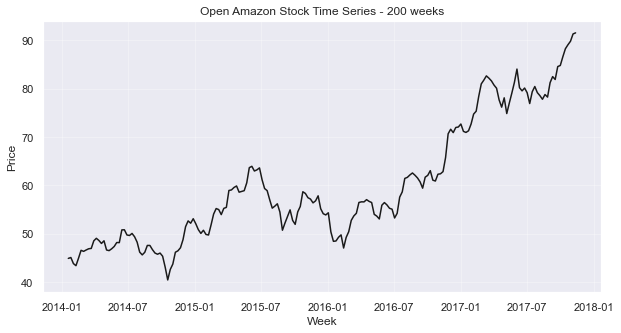

In [817]:
plot_n_last_weeks(data_weekly, 'Open', 200)

In [818]:
def get_train_test_data(df, series_name, series_weeks, input_weeks, 
                        test_weeks, sample_gap=1):
    """
    Utility processing function that splits an hourly time series into 
    train and test with keras-friendly format, according to user-specified
    choice of shape.    
    
    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_days (int): length of sequence input to network 
    test_days (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5
    
    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y     
    """
    
    forecast_series = get_n_last_weeks(df, series_name, series_weeks).values # reducing our forecast series to last n days

    train = forecast_series[:-test_weeks] # training data is remaining days until amount of test_hours
    test = forecast_series[-test_weeks:] # test data is the remaining test_hours

    train_X, train_y = [], []

    # range 0 through # of train samples - input_hours by sample_gap. 
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_weeks, sample_gap): 
        train_X.append(train[i:i+input_weeks]) # each training sample is of length input hours
        train_y.append(train[i+input_weeks]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras
    
    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_weeks] 
    test_y = test[input_weeks:] # test_y is remaining values from test set
    
    return train_X, test_X_init, train_y, test_y

In [819]:
def predict_and_plot_w(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_weeks)  #predict range is going to be from end of X_init to length of test_hours
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

In [820]:
series_weeks = 200
input_weeks = 15
test_weeks = 30

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_weekly, 'Open', series_weeks, 
                         input_weeks, test_weeks))

In [821]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (155, 15, 1)
Training output shape: (155,)
Test input shape: (15,)
Test output shape: (15,)


In [822]:
def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

## Base RNN Model

In [823]:
model_RNN1_w = fit_SimpleRNN(train_X, train_y, cell_units=10, epochs=10)

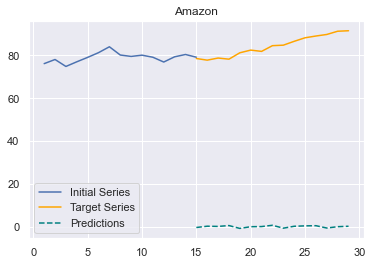

In [824]:
predict_and_plot(test_X_init, test_y, model_RNN1_w,
                 'Amazon')

## RNN2: RNN Model with increased cell units and epochs

In [829]:
model_RNN2_w = fit_SimpleRNN(train_X, train_y, cell_units=200, epochs=10000)


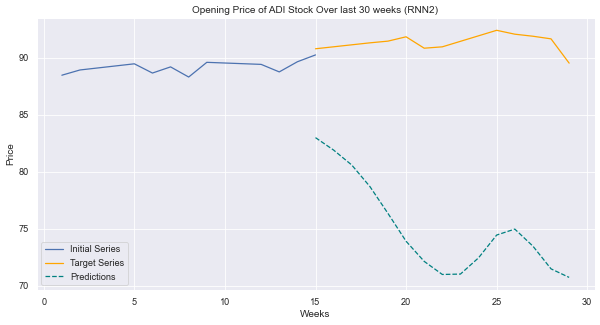

In [830]:
train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_new, 'Open', series_days, 
                         input_days, test_days))
#model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 

plt.figure(figsize=(12, 6), dpi=60)

predict_and_plot(test_X_init, test_y, model_RNN2_w, 
                 'Amazon')
plt.xlabel('Weeks');
plt.ylabel('Price')
plt.title('Opening Price of ADI Stock Over last 30 weeks (RNN2)');



In [831]:
model_RNN2.summary()

Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_107 (SimpleRNN)  (None, 200)               40400     
                                                                 
 dense_127 (Dense)           (None, 1)                 201       
                                                                 
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________


## RNN3: RNN Model with increased cell units and epochs

In [832]:
model_RNN3_w = fit_SimpleRNN(train_X, train_y, cell_units=250, epochs=10000)


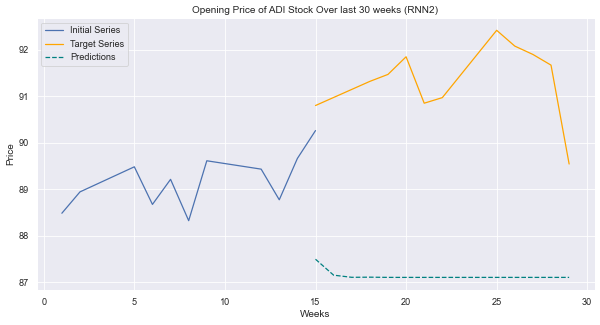

In [833]:
train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_new, 'Open', series_days, 
                         input_days, test_days))
#model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 

plt.figure(figsize=(12, 6), dpi=60)

predict_and_plot(test_X_init, test_y, model_RNN3_w, 
                 'Amazon')
plt.xlabel('Weeks');
plt.ylabel('Price')
plt.title('Opening Price of ADI Stock Over last 30 weeks (RNN2)');



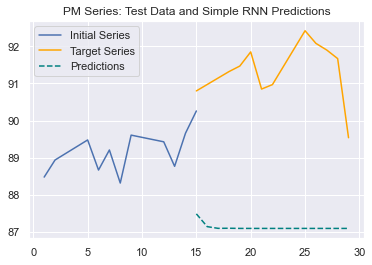

In [834]:
predict_and_plot(test_X_init, test_y, model_RNN3_w,
                 'PM Series: Test Data and Simple RNN Predictions')

In [835]:
model_RNN3_w.summary()

Model: "sequential_133"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_113 (SimpleRNN)  (None, 250)               63000     
                                                                 
 dense_133 (Dense)           (None, 1)                 251       
                                                                 
Total params: 63,251
Trainable params: 63,251
Non-trainable params: 0
_________________________________________________________________


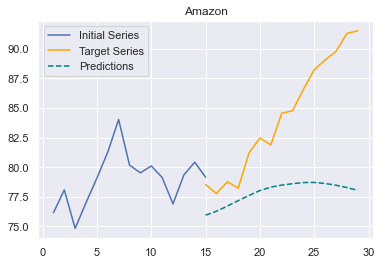

In [715]:
model_LSTM_w = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 

predict_and_plot(test_X_init, test_y, model_LSTM_w, 
                 'Amazon')

In [716]:
series_weeks = 200
input_weeks = 15
test_weeks = 30

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_weekly, 'Low', series_weeks, 
                         input_weeks, test_weeks))

## RNN2: RNN Model with increased cell units and epochs

In [717]:
model_RNN2_w_low = fit_SimpleRNN(train_X, train_y, cell_units=200, epochs=10000)


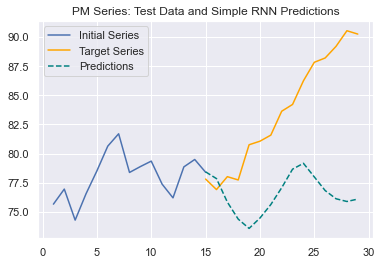

In [718]:
predict_and_plot(test_X_init, test_y, model_RNN2_w_low,
                 'PM Series: Test Data and Simple RNN Predictions')

In [719]:
model_RNN2_w_low.summary()

Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_102 (SimpleRNN)  (None, 200)               40400     
                                                                 
 dense_122 (Dense)           (None, 1)                 201       
                                                                 
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________


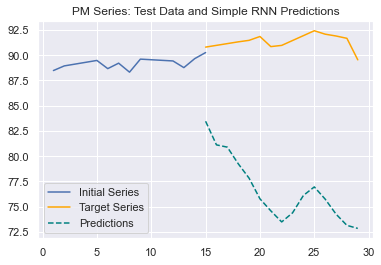

In [836]:
predict_and_plot(test_X_init, test_y, model_RNN2_w_low,
                 'PM Series: Test Data and Simple RNN Predictions')

## RNN3: RNN Model with increased cell units and epochs

In [827]:
model_RNN3_w_low = fit_SimpleRNN(train_X, train_y, cell_units=250, epochs=10000)


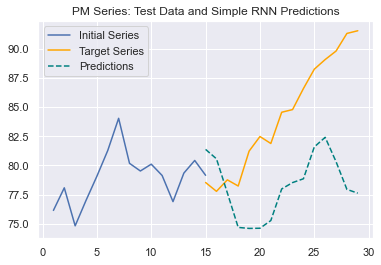

In [828]:
predict_and_plot(test_X_init, test_y, model_RNN3_w_low,
                 'PM Series: Test Data and Simple RNN Predictions')

In [722]:
model_RNN3_w_low.summary()

Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_103 (SimpleRNN)  (None, 250)               63000     
                                                                 
 dense_123 (Dense)           (None, 1)                 251       
                                                                 
Total params: 63,251
Trainable params: 63,251
Non-trainable params: 0
_________________________________________________________________


In [874]:
series_weeks = 200
input_weeks = 8
test_weeks = 30

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_weekly, 'High', series_weeks, 
                         input_weeks, test_weeks))

## RNN2: RNN Model with increased cell units and epochs

In [844]:
model_RNN2_w_high = fit_SimpleRNN(train_X, train_y, cell_units=200, epochs=10000)


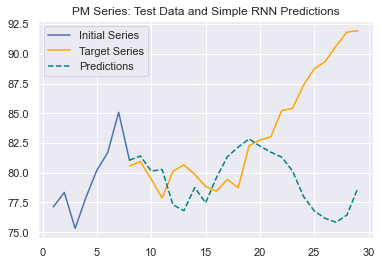

In [872]:
predict_and_plot(test_X_init, test_y, model_RNN2_w_high,
                 'PM Series: Test Data and Simple RNN Predictions')

### RNN2 prediction for High series

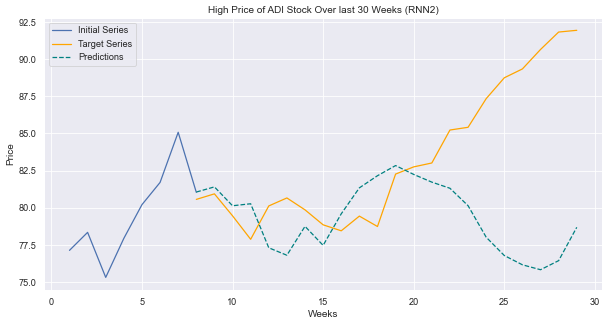

In [891]:
train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_weekly, 'High', series_weeks, 
                         input_weeks, test_weeks))
#model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 

plt.figure(figsize=(12, 6), dpi=60)

predict_and_plot(test_X_init, test_y, model_RNN2_w_high, 
                 'Amazon')
plt.xlabel('Weeks');
plt.ylabel('Price')
plt.title('High Price of ADI Stock Over last 30 Weeks (RNN2)');



In [892]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_RNN2_w_high)
y_preds = np.array(y_preds)
test_y = test_y.reshape(-1,1)
np.sqrt(((test_y[:12] - y_preds[:12])**2).sum()/12)

2.0303289253050028

### RNN2 prediction for Low Series

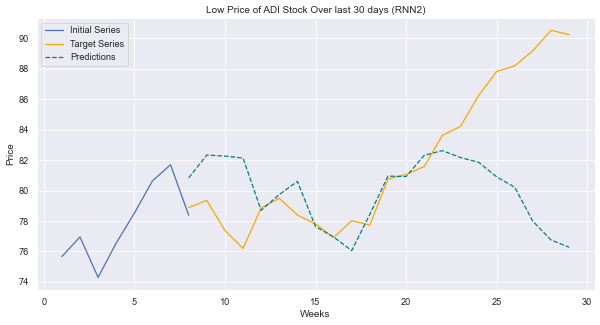

In [901]:
train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_weekly, 'Low', series_weeks, 
                         input_weeks, test_weeks))
#model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 
plt.figure(figsize=(12, 6), dpi=60)

predict_and_plot(test_X_init, test_y, model_RNN2_w_high, 
                 'Amazon')
plt.xlabel('Weeks');
plt.ylabel('Price')
plt.title('Low Price of ADI Stock Over last 30 days (RNN2)');



In [894]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_RNN2_w_high)
y_preds = np.array(y_preds)
test_y = test_y.reshape(-1,1)
np.sqrt(((test_y[:12] - y_preds[:12])**2).sum()/12)

2.6032266914045805

### RNN2 prediction for Closing Series

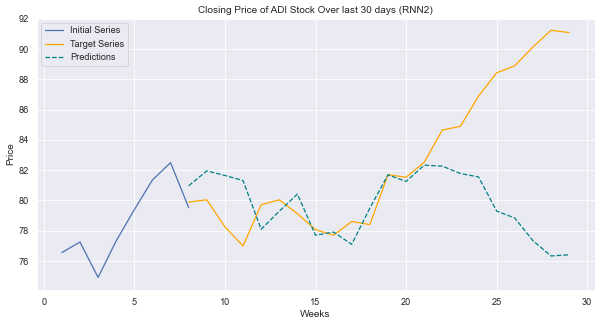

In [900]:
train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_weekly, 'Close', series_weeks, 
                         input_weeks, test_weeks))
#model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 
plt.figure(figsize=(12, 6), dpi=60)

predict_and_plot(test_X_init, test_y, model_RNN2_w_high, 
                 'Amazon')
plt.xlabel('Weeks');
plt.ylabel('Price')
plt.title('Closing Price of ADI Stock Over last 30 days (RNN2)');



In [896]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_RNN2_w_high)
y_preds = np.array(y_preds)
test_y = test_y.reshape(-1,1)
np.sqrt(((test_y[:12] - y_preds[:12])**2).sum()/12)

1.9048447480683441

### RNN2 prediction for Opening Series

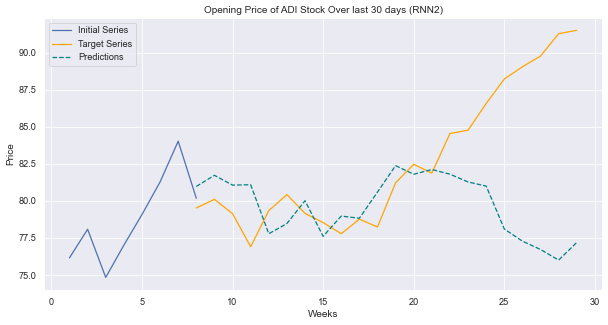

In [898]:
train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(data_weekly, 'Open', series_weeks, 
                         input_weeks, test_weeks))
#model_LSTM = fit_LSTM(train_X, train_y, cell_units=100, epochs=6000) 
plt.figure(figsize=(12, 6), dpi=60)

predict_and_plot(test_X_init, test_y, model_RNN2_w_high, 
                 'Amazon')
plt.xlabel('Weeks');
plt.ylabel('Price')
plt.title('Opening Price of ADI Stock Over last 30 days (RNN2)');



In [899]:
y_preds = predict(test_X_init, n_steps=len(test_y), model=model_RNN2_w_high)
y_preds = np.array(y_preds)
test_y = test_y.reshape(-1,1)
np.sqrt(((test_y[:12] - y_preds[:12])**2).sum()/12)

1.8745881100617332